<a href="https://colab.research.google.com/github/nihar6697/My_Project1/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

#Loading Dataset

In [2]:
df = pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#Data Cleaning

In [3]:
df.shape

(7109, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Dropping unwanted columns

In [5]:
#project id is not necessary for predicting sale
#similarly before predicting sale price u do not know what can be the regd fee and commission so we can't use these features
df.drop(['PRT_ID', 'REG_FEE', 'COMMIS'],axis=1,inplace=True)

In [6]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [7]:
df.shape

(7109, 19)

Checking missing values

In [8]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [9]:
# Removing all the null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

There are no null values after dropping

In [11]:
df.shape

(7056, 19)

Dropping duplicates

In [12]:
#how many rows duplicate
df.duplicated().sum()    

0

In [13]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [14]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

changing the datatype

In [15]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)

In [18]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

Outlier check in continious coloumn

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


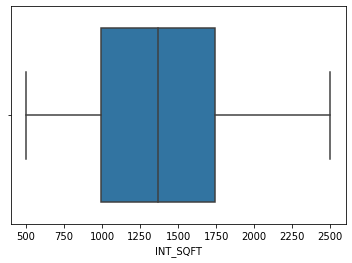

In [16]:
sns.boxplot(df["INT_SQFT"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


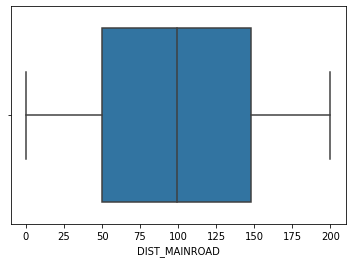

In [17]:
sns.boxplot(df["DIST_MAINROAD"])

Creating a new coloumn i.e. Age of the building based on the DATE_SALE and DATE_BUILD

In [18]:
df['PROPERTY_AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

Dropping DATE_SALE and DATE_BUILD coloumn

In [19]:
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

In [20]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'PROPERTY_AGE'],
      dtype='object')

Checking Unique elements in Categorical Columns

In [21]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']


Error in spelling
Rectifying those spelling error

In [22]:
df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar',],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],  'T Nagar', inplace = True)

df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)

df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)

df['UTILITY_AVAIL'].replace(['AllPub'],'All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ', 'NoSeWa'],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [23]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']


In [24]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'PROPERTY_AGE'],
      dtype='object')

#Exploratory data analysis

#Distribution of features

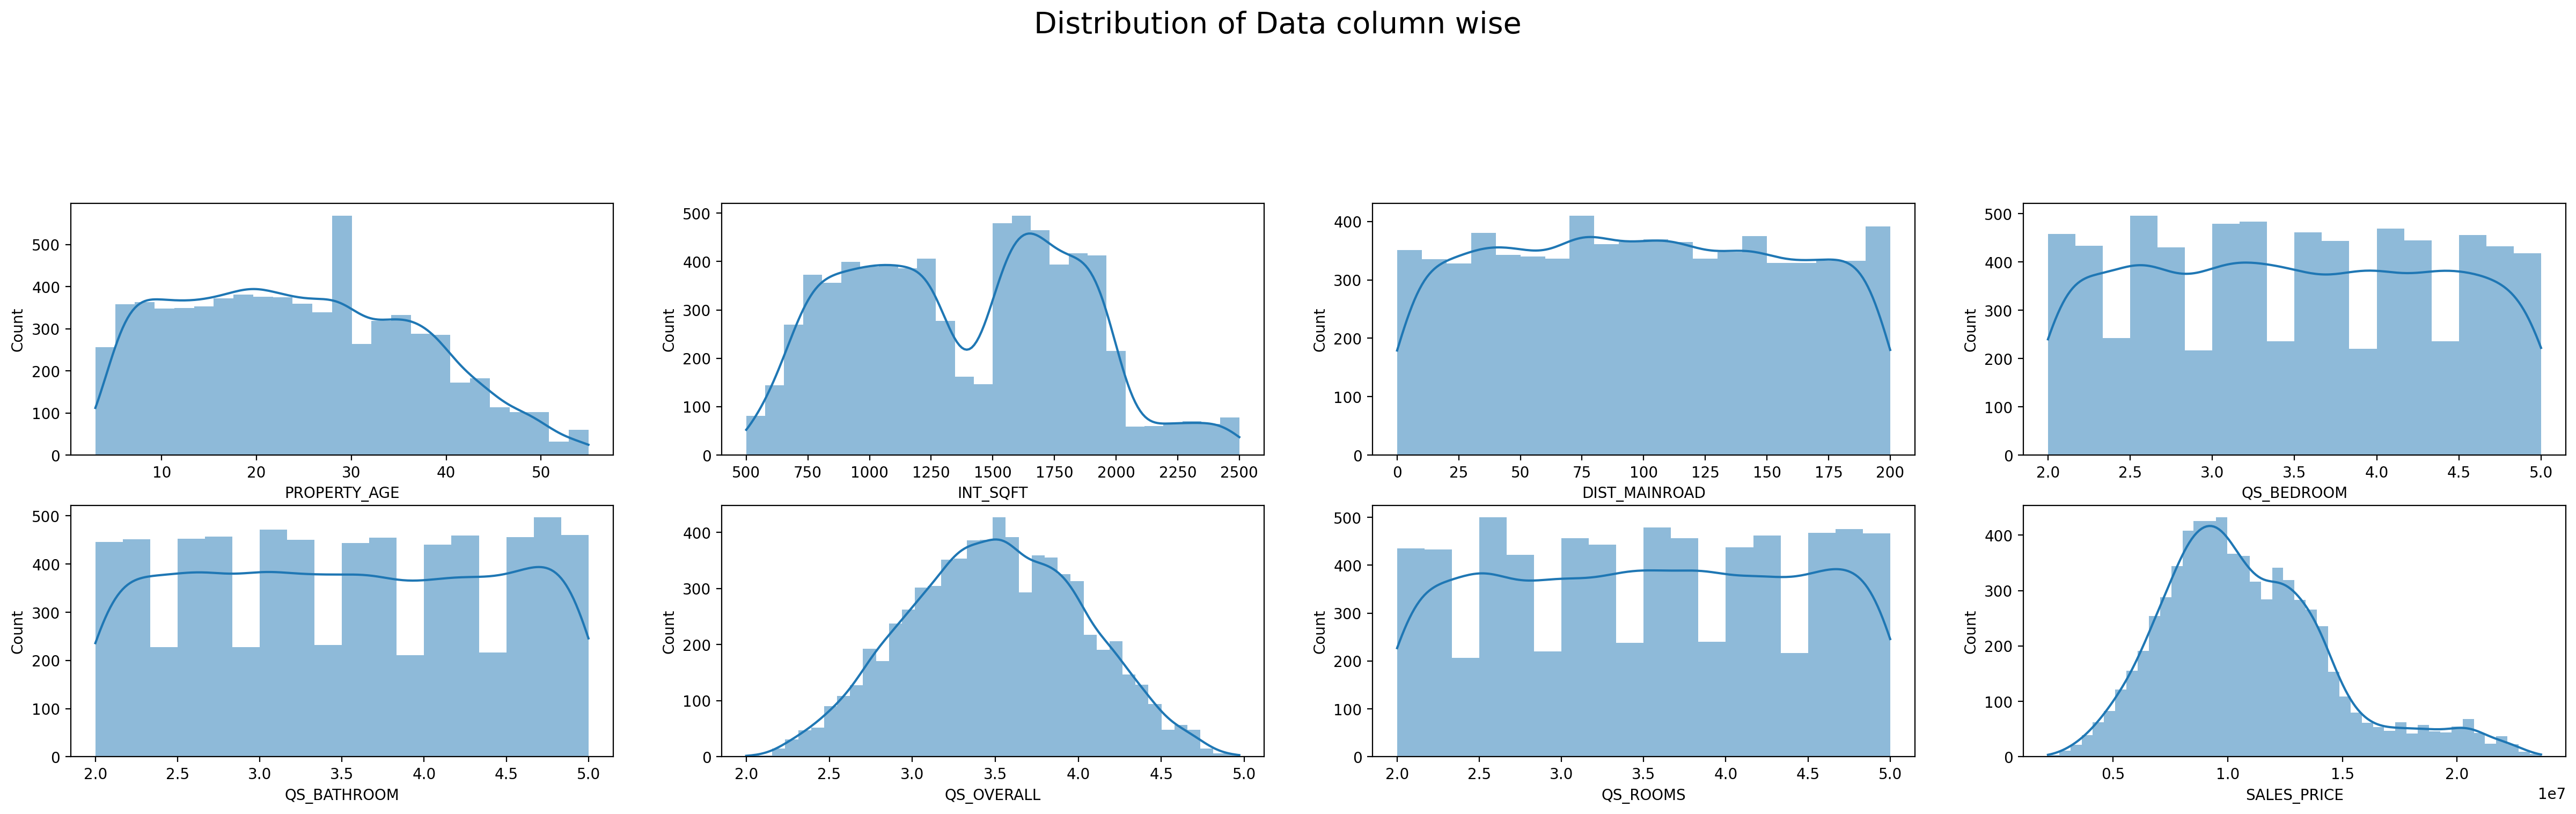

In [25]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df.PROPERTY_AGE, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(df.INT_SQFT, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(df.DIST_MAINROAD, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(df.QS_BEDROOM, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(df.QS_BATHROOM, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(df.QS_OVERALL, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(df.QS_ROOMS, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.histplot(df.SALES_PRICE, linewidth=0,kde=True)



plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()


Interpretation:-

Here we can analise from this distribution that columns are normally distributed in most of the cases and in very few column thd data is very slightly skewed.

#Continious numerical coloumn

A continious data is data that is measured and can be divided into smaller and smaller units

plotting continious numerical coloumn vs target coloumn

histplot

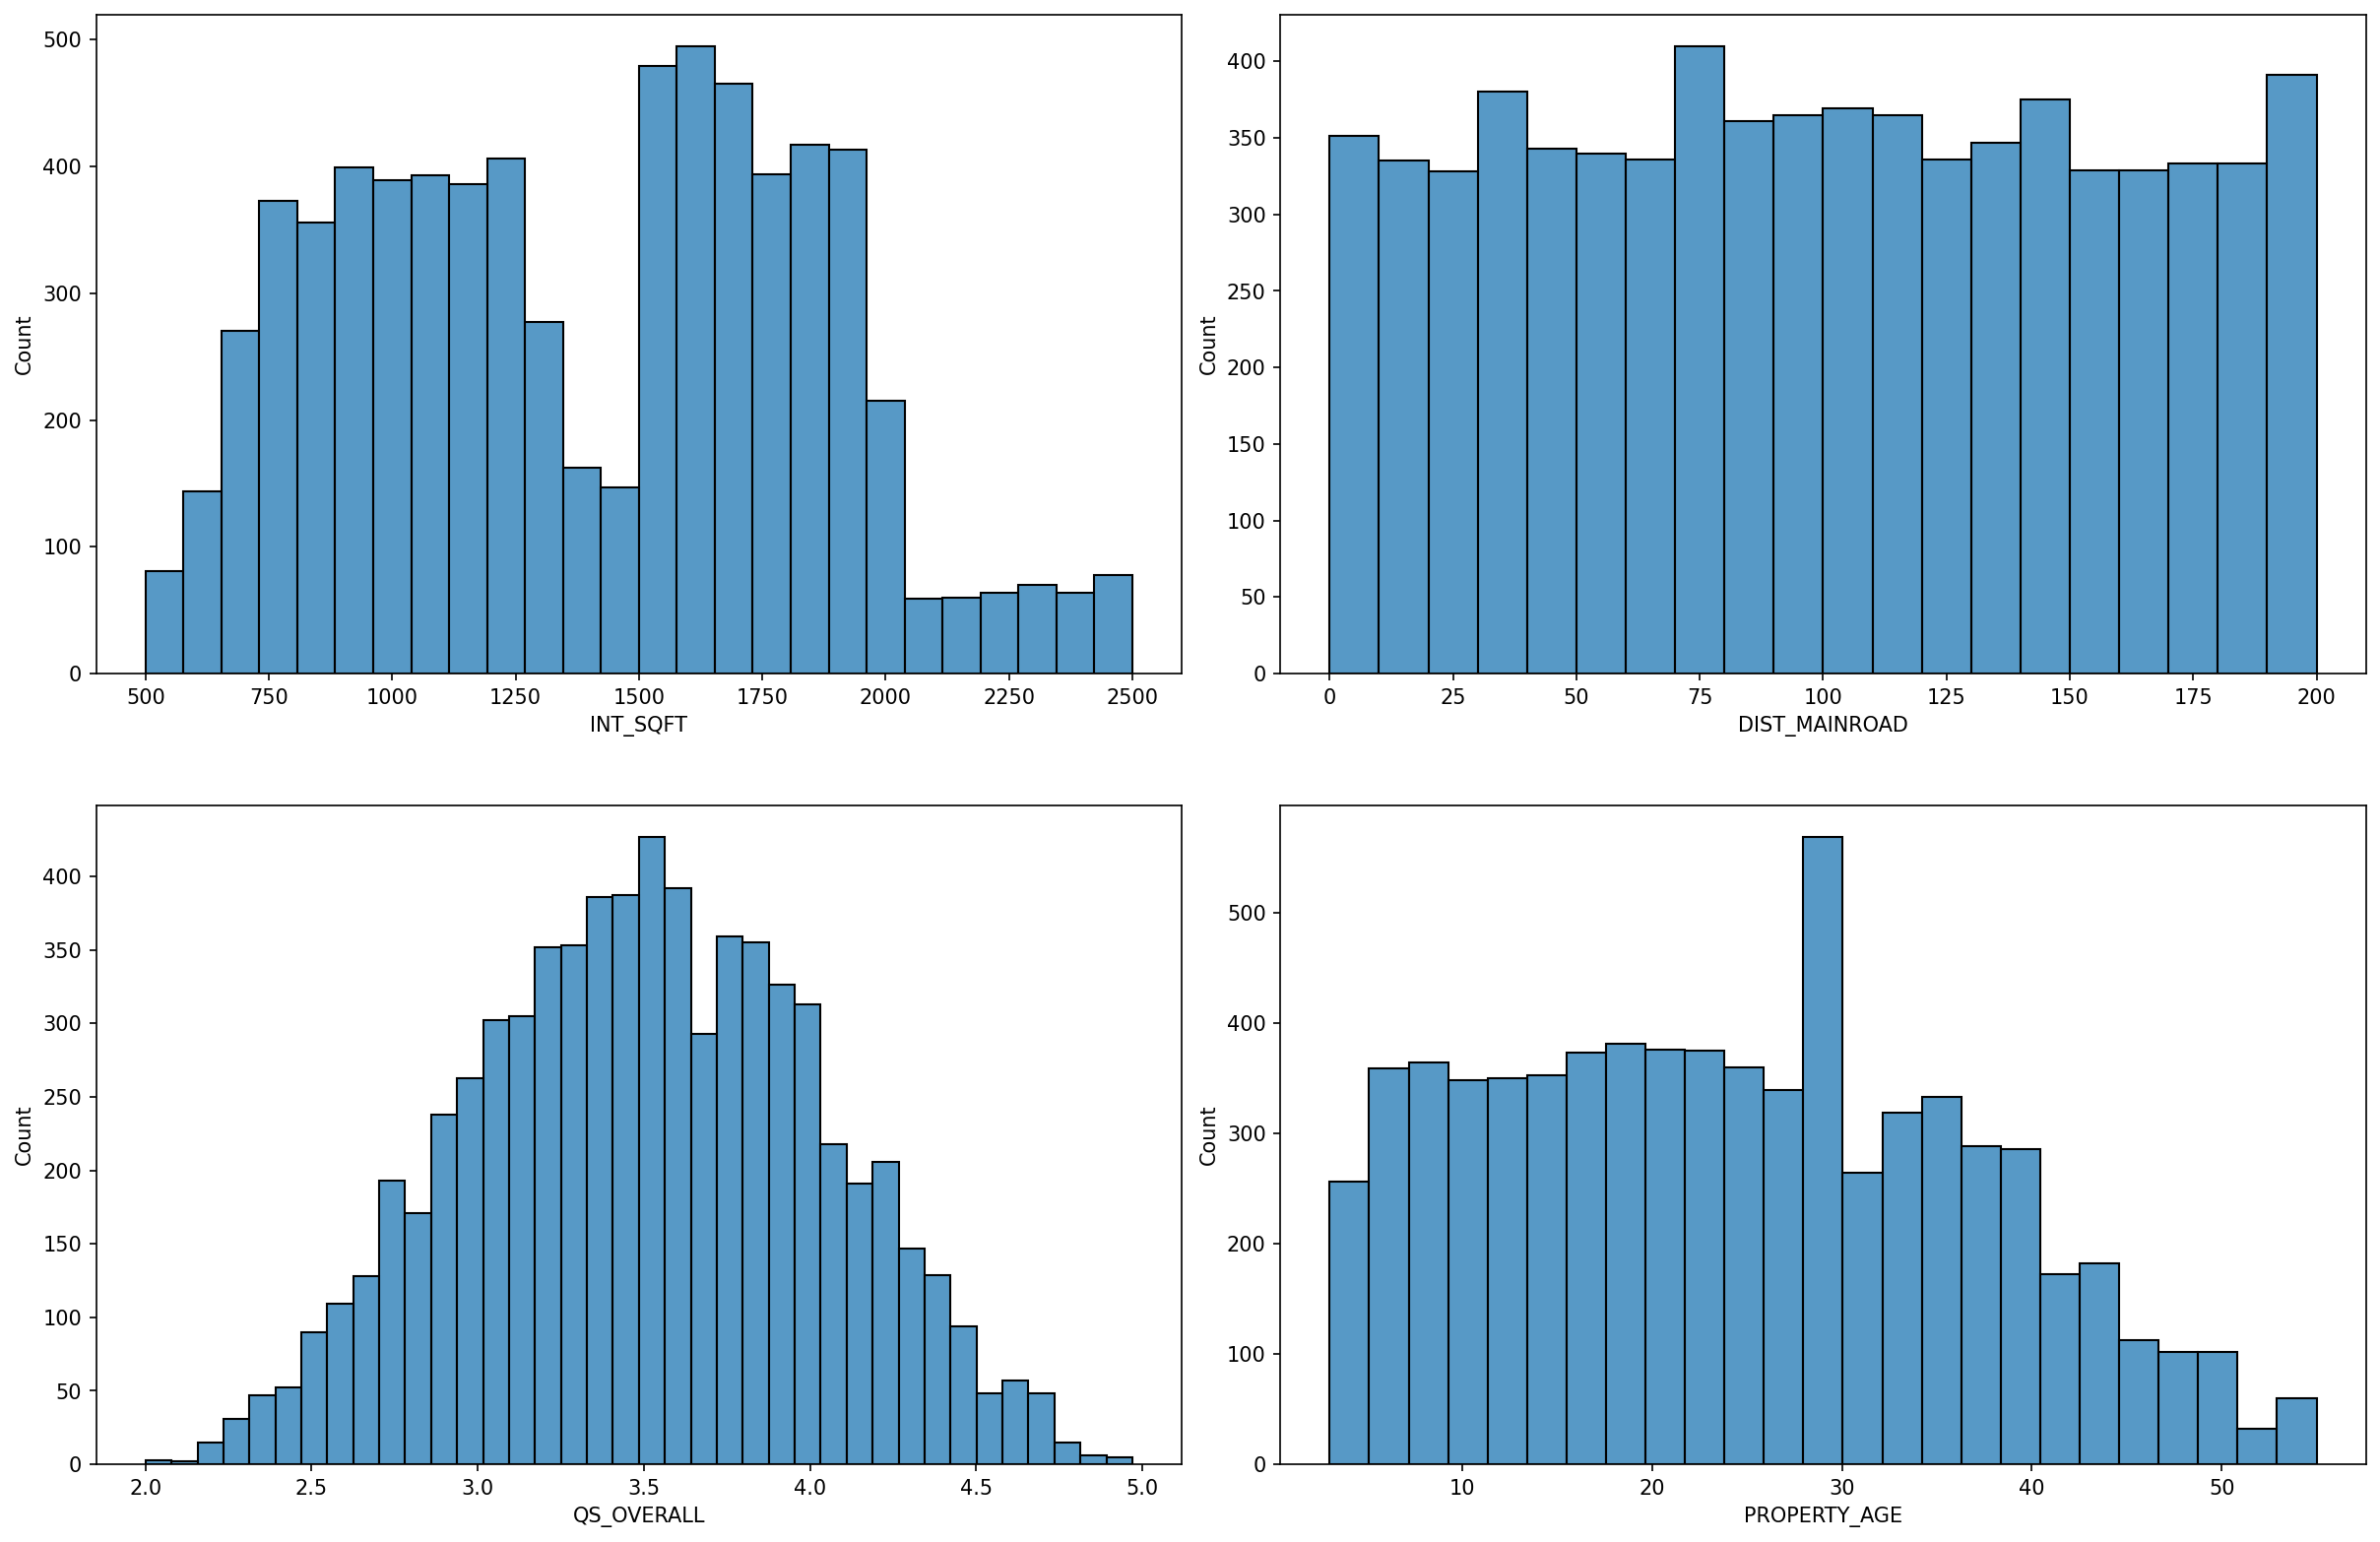

In [26]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,5),(0,0),colspan=2)
sns.histplot(df["INT_SQFT"])


plt.subplot2grid((2,5),(0,2),colspan=2)
sns.histplot(df["DIST_MAINROAD"])

plt.subplot2grid((2,5),(1,0),colspan=2)
sns.histplot(df["QS_OVERALL"])

plt.subplot2grid((2,5),(1,2),colspan=2)
sns.histplot(df["PROPERTY_AGE"])

plt.show()

Scatter plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


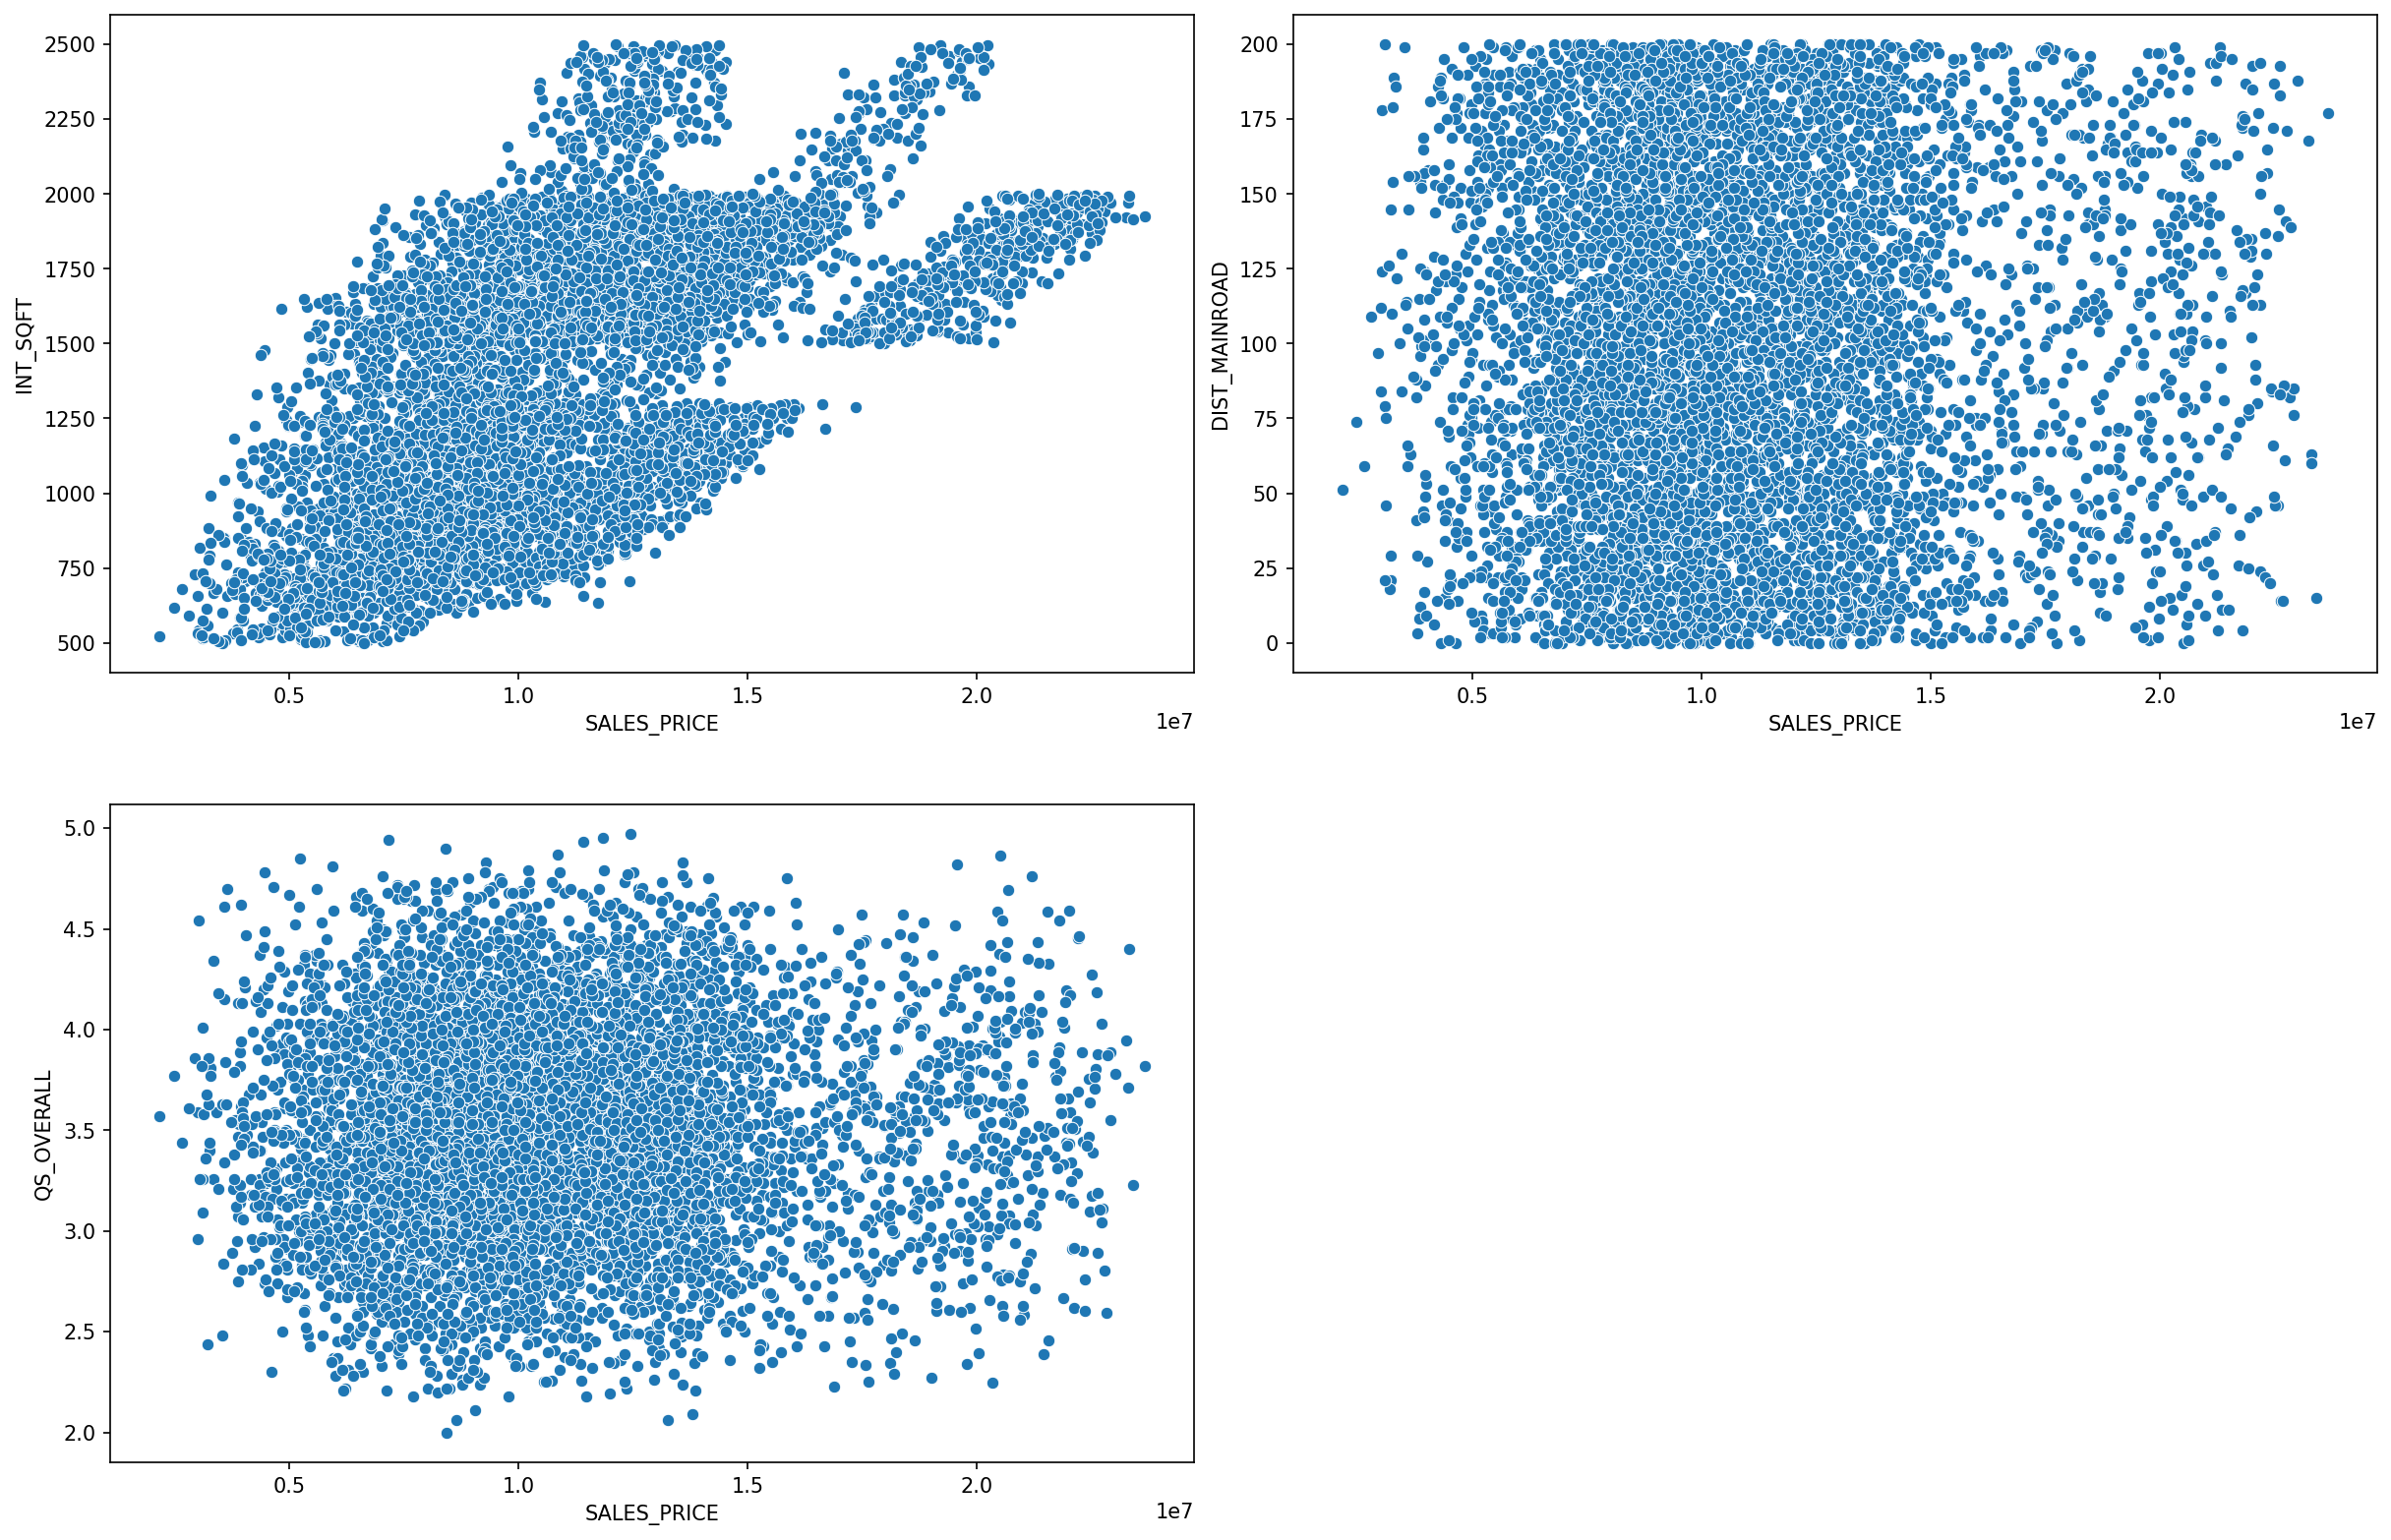

In [27]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,5),(0,0),colspan=2)
sns.scatterplot(df["SALES_PRICE"],df["INT_SQFT"])
#categorical=xaxis
#numerical=yaxis

plt.subplot2grid((2,5),(0,2),colspan=2)
sns.scatterplot(df["SALES_PRICE"],df["DIST_MAINROAD"])

plt.subplot2grid((2,5),(1,0),colspan=2)
sns.scatterplot(df["SALES_PRICE"],df["QS_OVERALL"])

plt.show()

Regression plot(Regplot)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


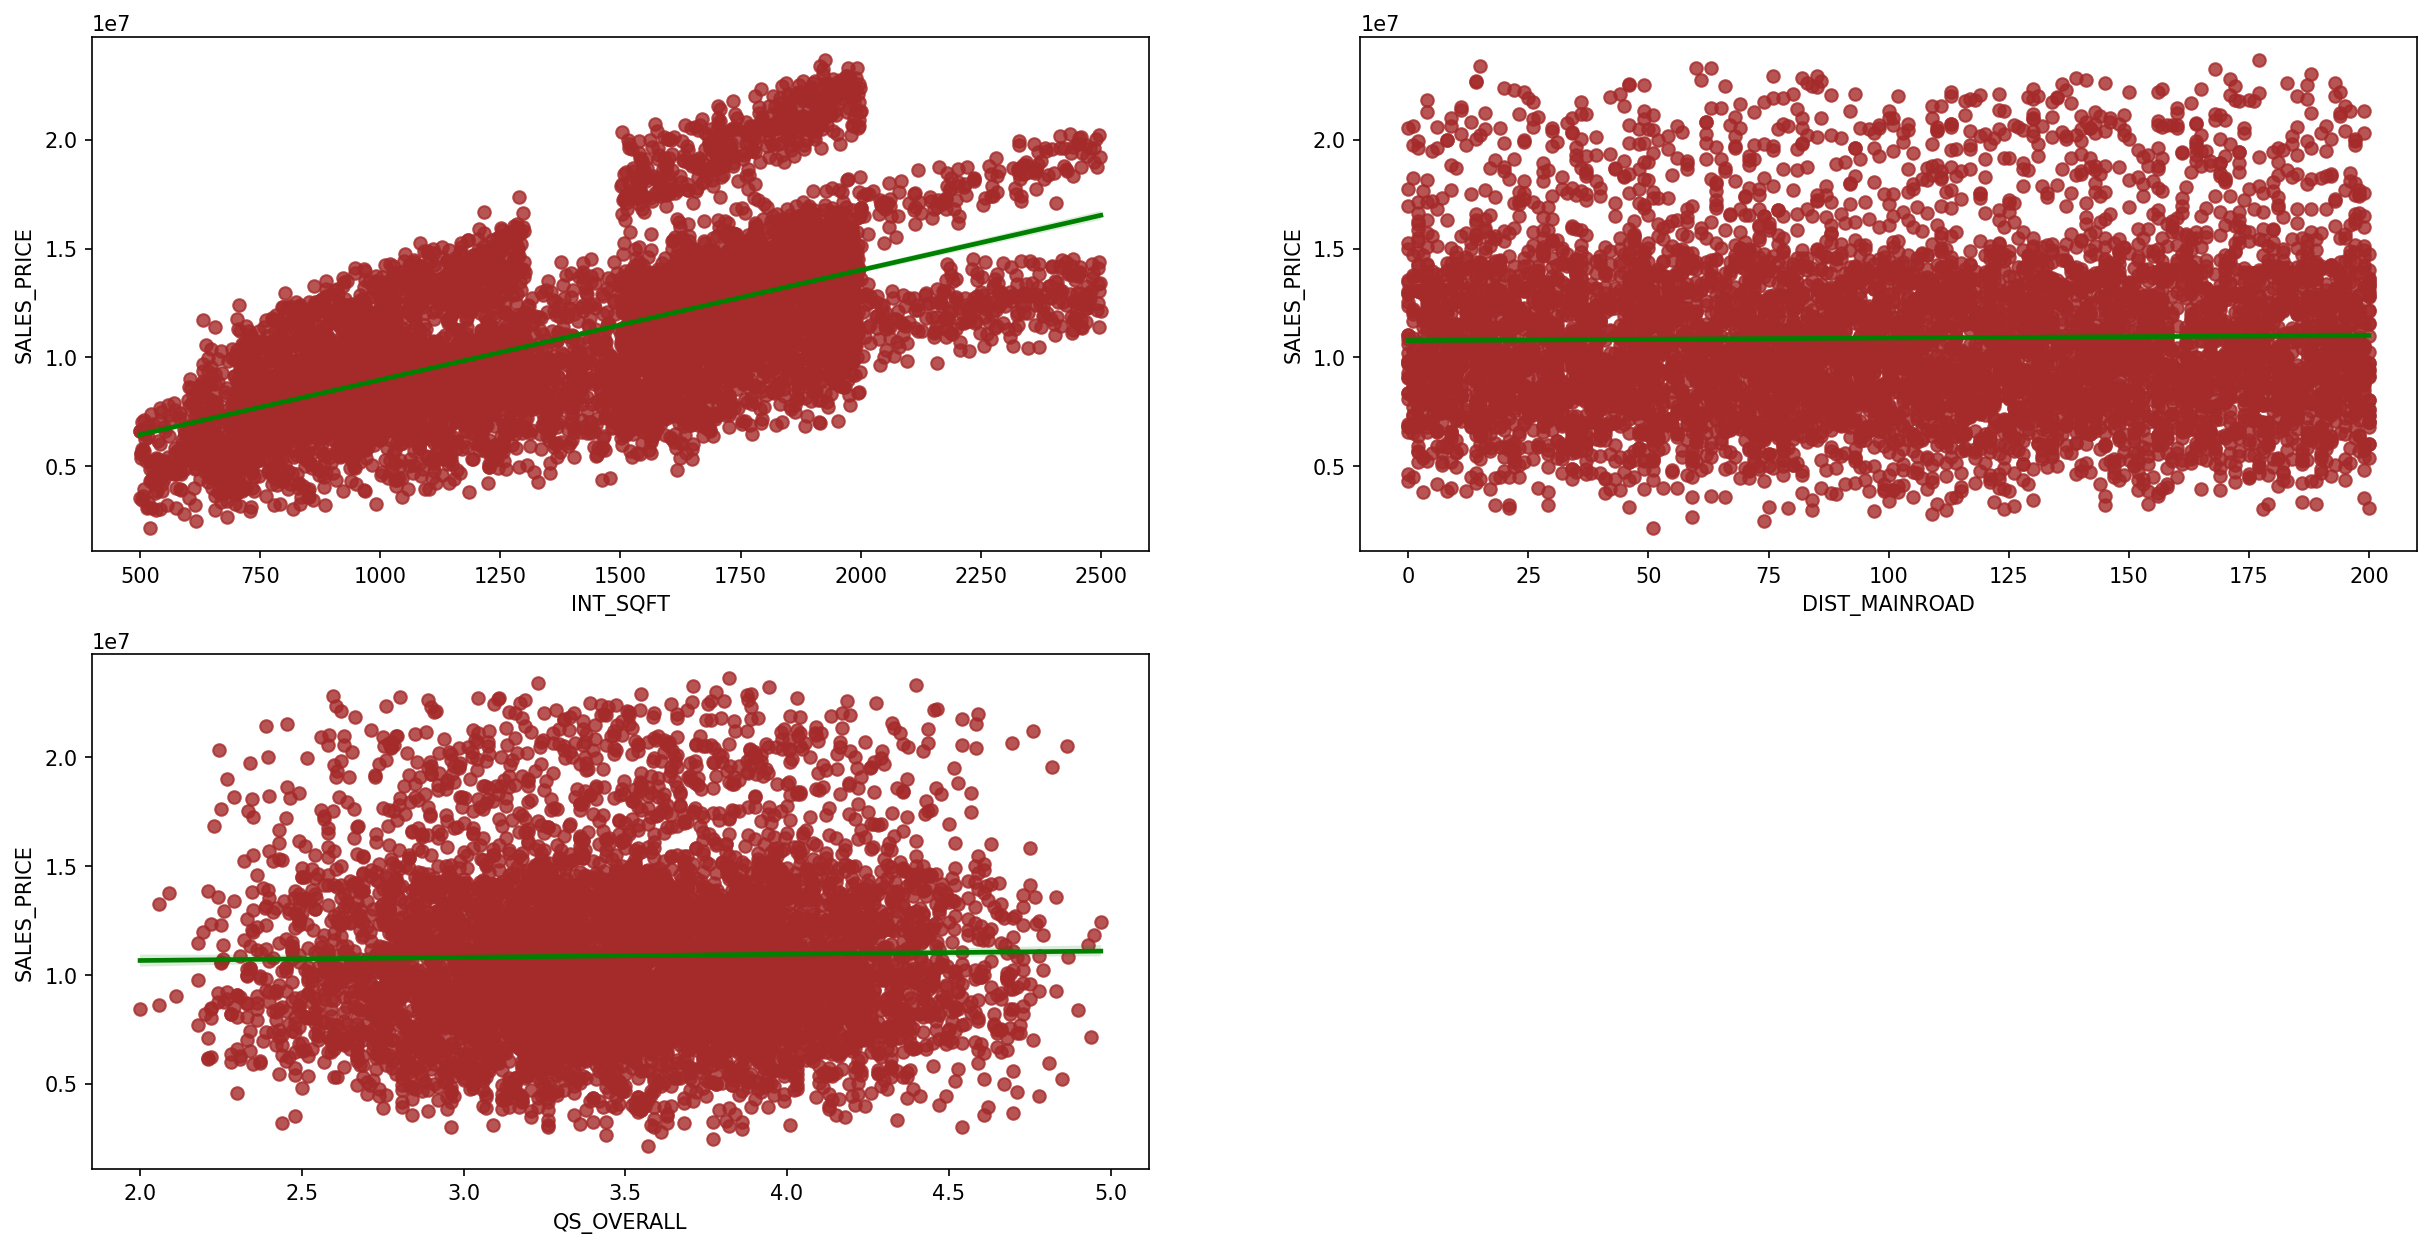

In [28]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df.INT_SQFT, df.SALES_PRICE, scatter_kws={"color": "brown"}, line_kws={"color": "green"})

plt.subplot(2,2,2)
sns.regplot(df.DIST_MAINROAD, df.SALES_PRICE, scatter_kws={"color": "brown"}, line_kws={"color": "green"})

plt.subplot(2,2,3)
sns.regplot(df.QS_OVERALL, df.SALES_PRICE, scatter_kws={"color": "brown"}, line_kws={"color": "green"})

plt.show()

Interpretation

Here we can conclude that:-

1. INT_SQFT has relation with SALES_PRICE(target coloumn).So  we can keep INT_SQFT as feature for our model. 

  2. DIST_MAINROAD has no relation with target coloumn.So we can drop it

   3. QS_OVERALL is constant whatever the SALES_PRICE.So we can drop it also

#Discrete numerical coloumn

A discrete data that is counted and cannot be divided into smaller units

Plotting discrete numerical coloumn vs target coloumn

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

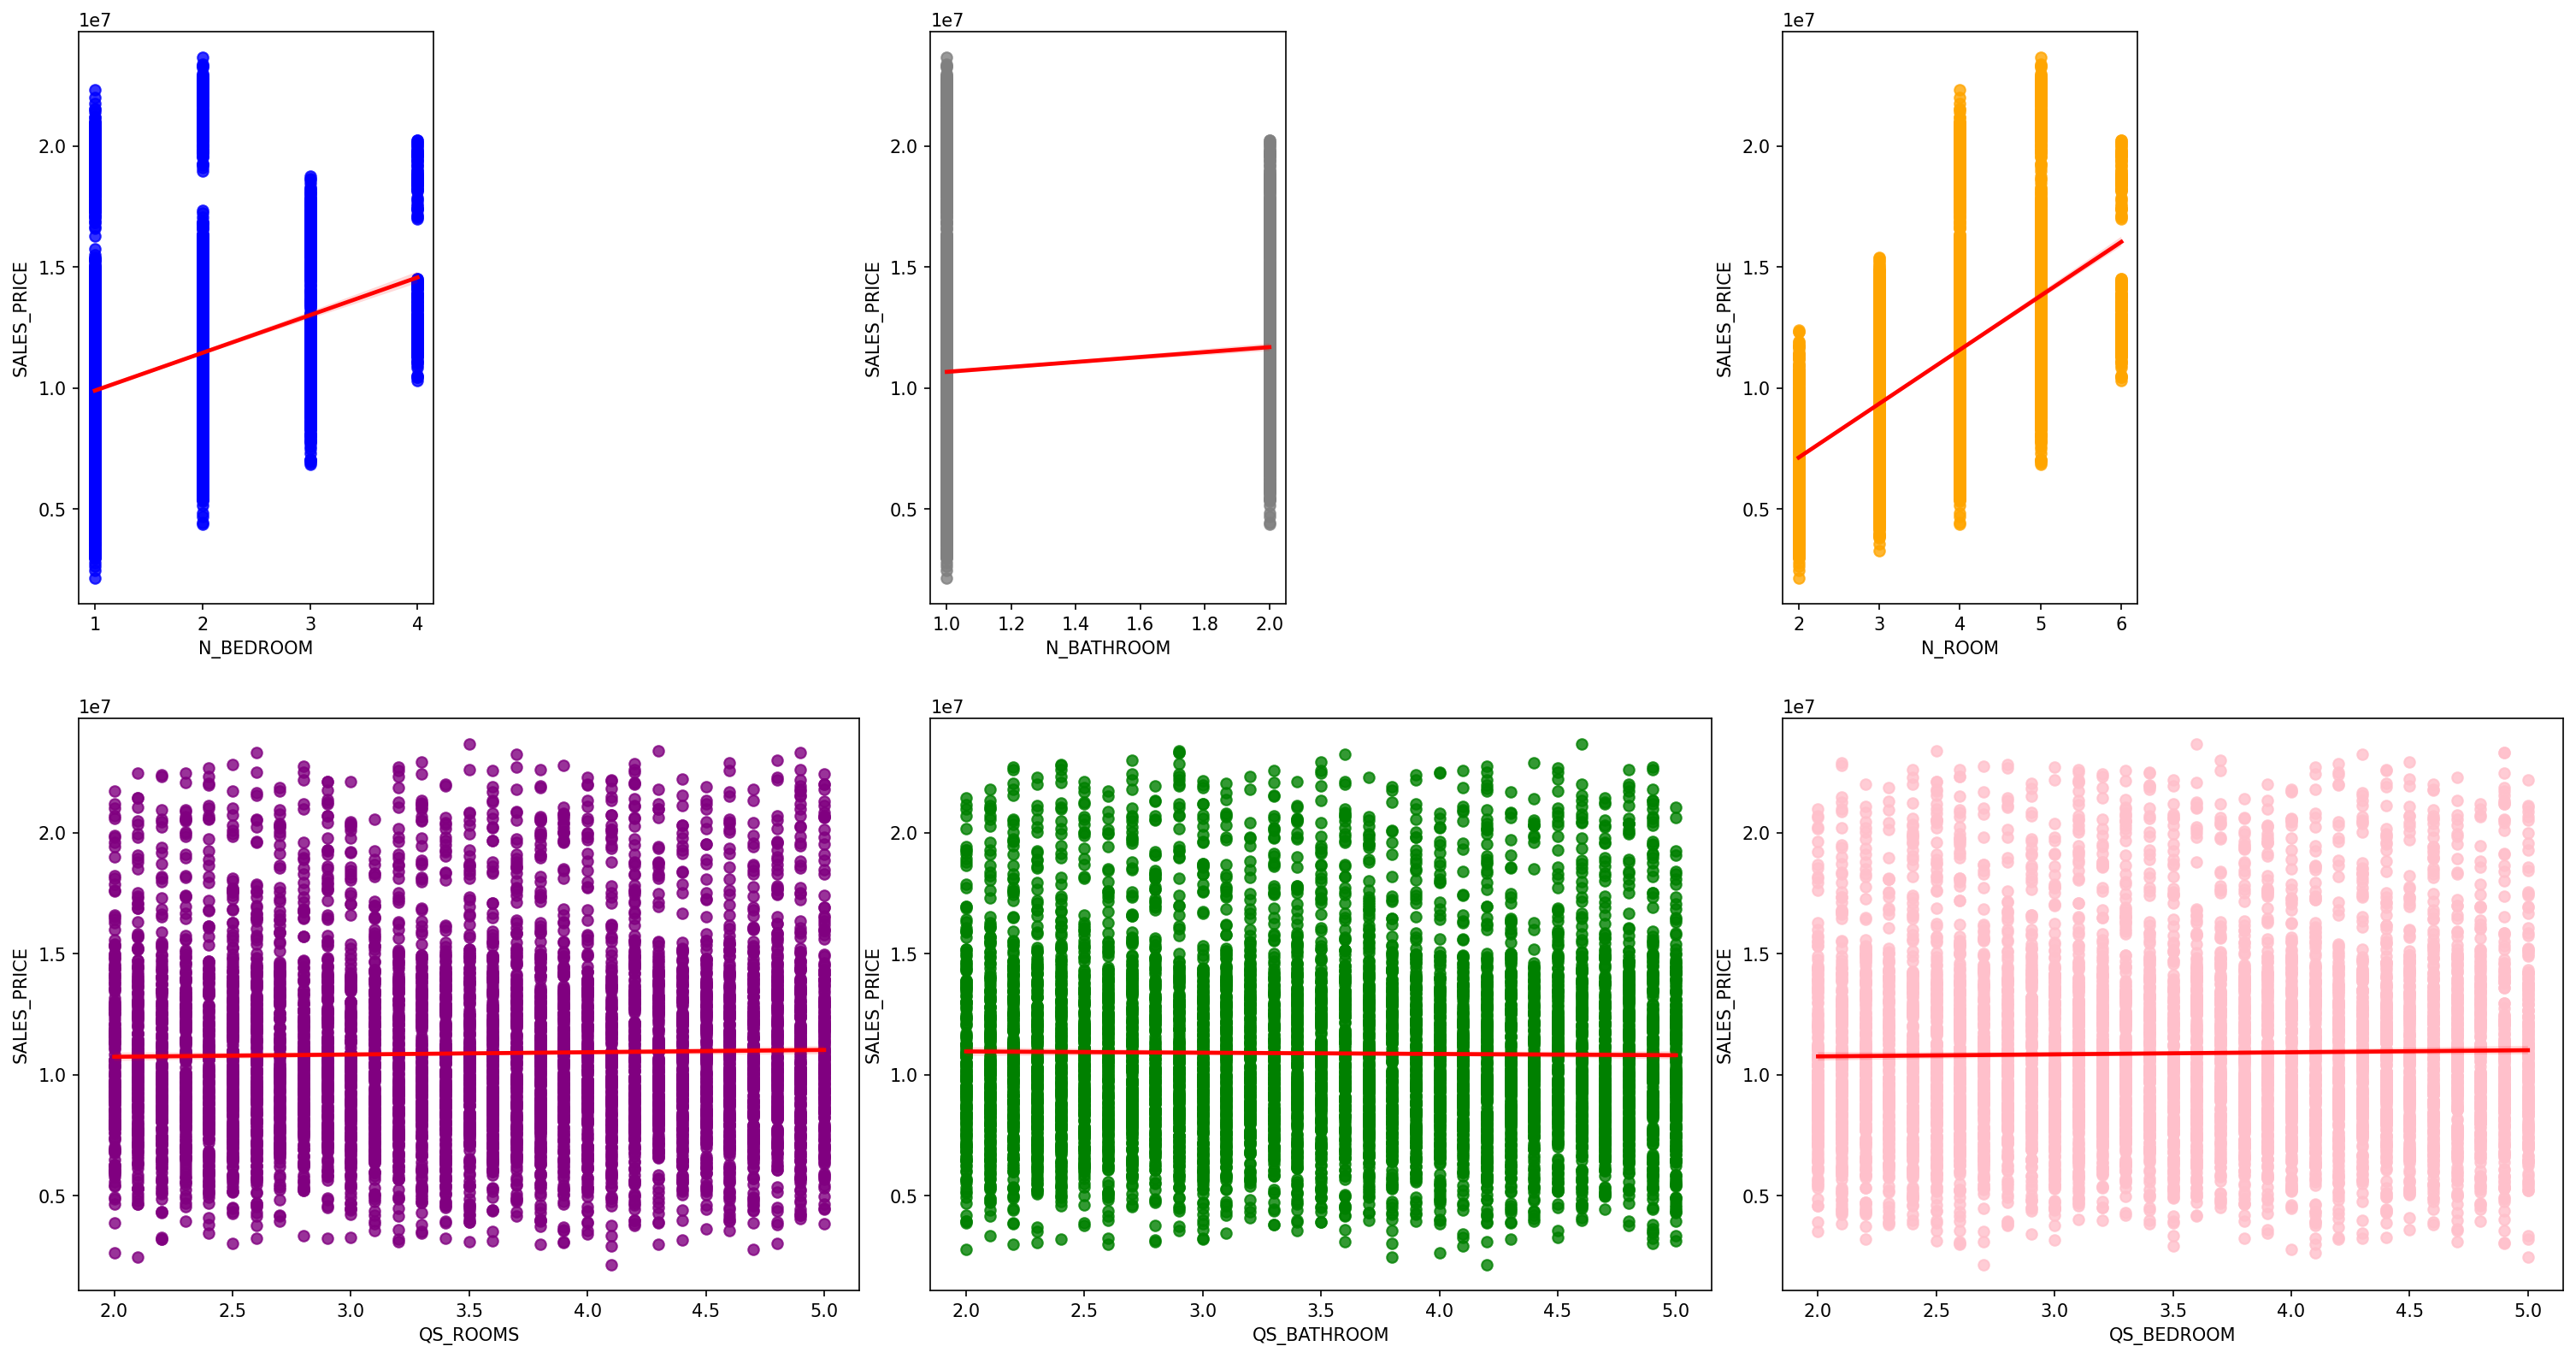

In [29]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df.N_BEDROOM, df.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df.N_BATHROOM, df.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,4))
sns.regplot(df.N_ROOM, df.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(df.QS_ROOMS, df.SALES_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(df.QS_BATHROOM, df.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,4),colspan=2)
sns.regplot(df.QS_BEDROOM, df.SALES_PRICE, scatter_kws={"color": "pink"}, line_kws={"color": "red"})


plt.show()

Interpretation

Here we can conclude that:-

1. SALES_PRICE is influenced by N_BEDROOM and N_ROOM.There is a relation in between them.So we can keep these features

   2. N_BATHROOM has very small marginal relation with SALES_PRICE.So we can drop it

   3. QS_ROOMS,QS_BATHROOM,QS_BEDROOM have no relation with target coloumn.These are of no use for our model.

#Categorical coloumn

Plotting categorical data vs target coloumn

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

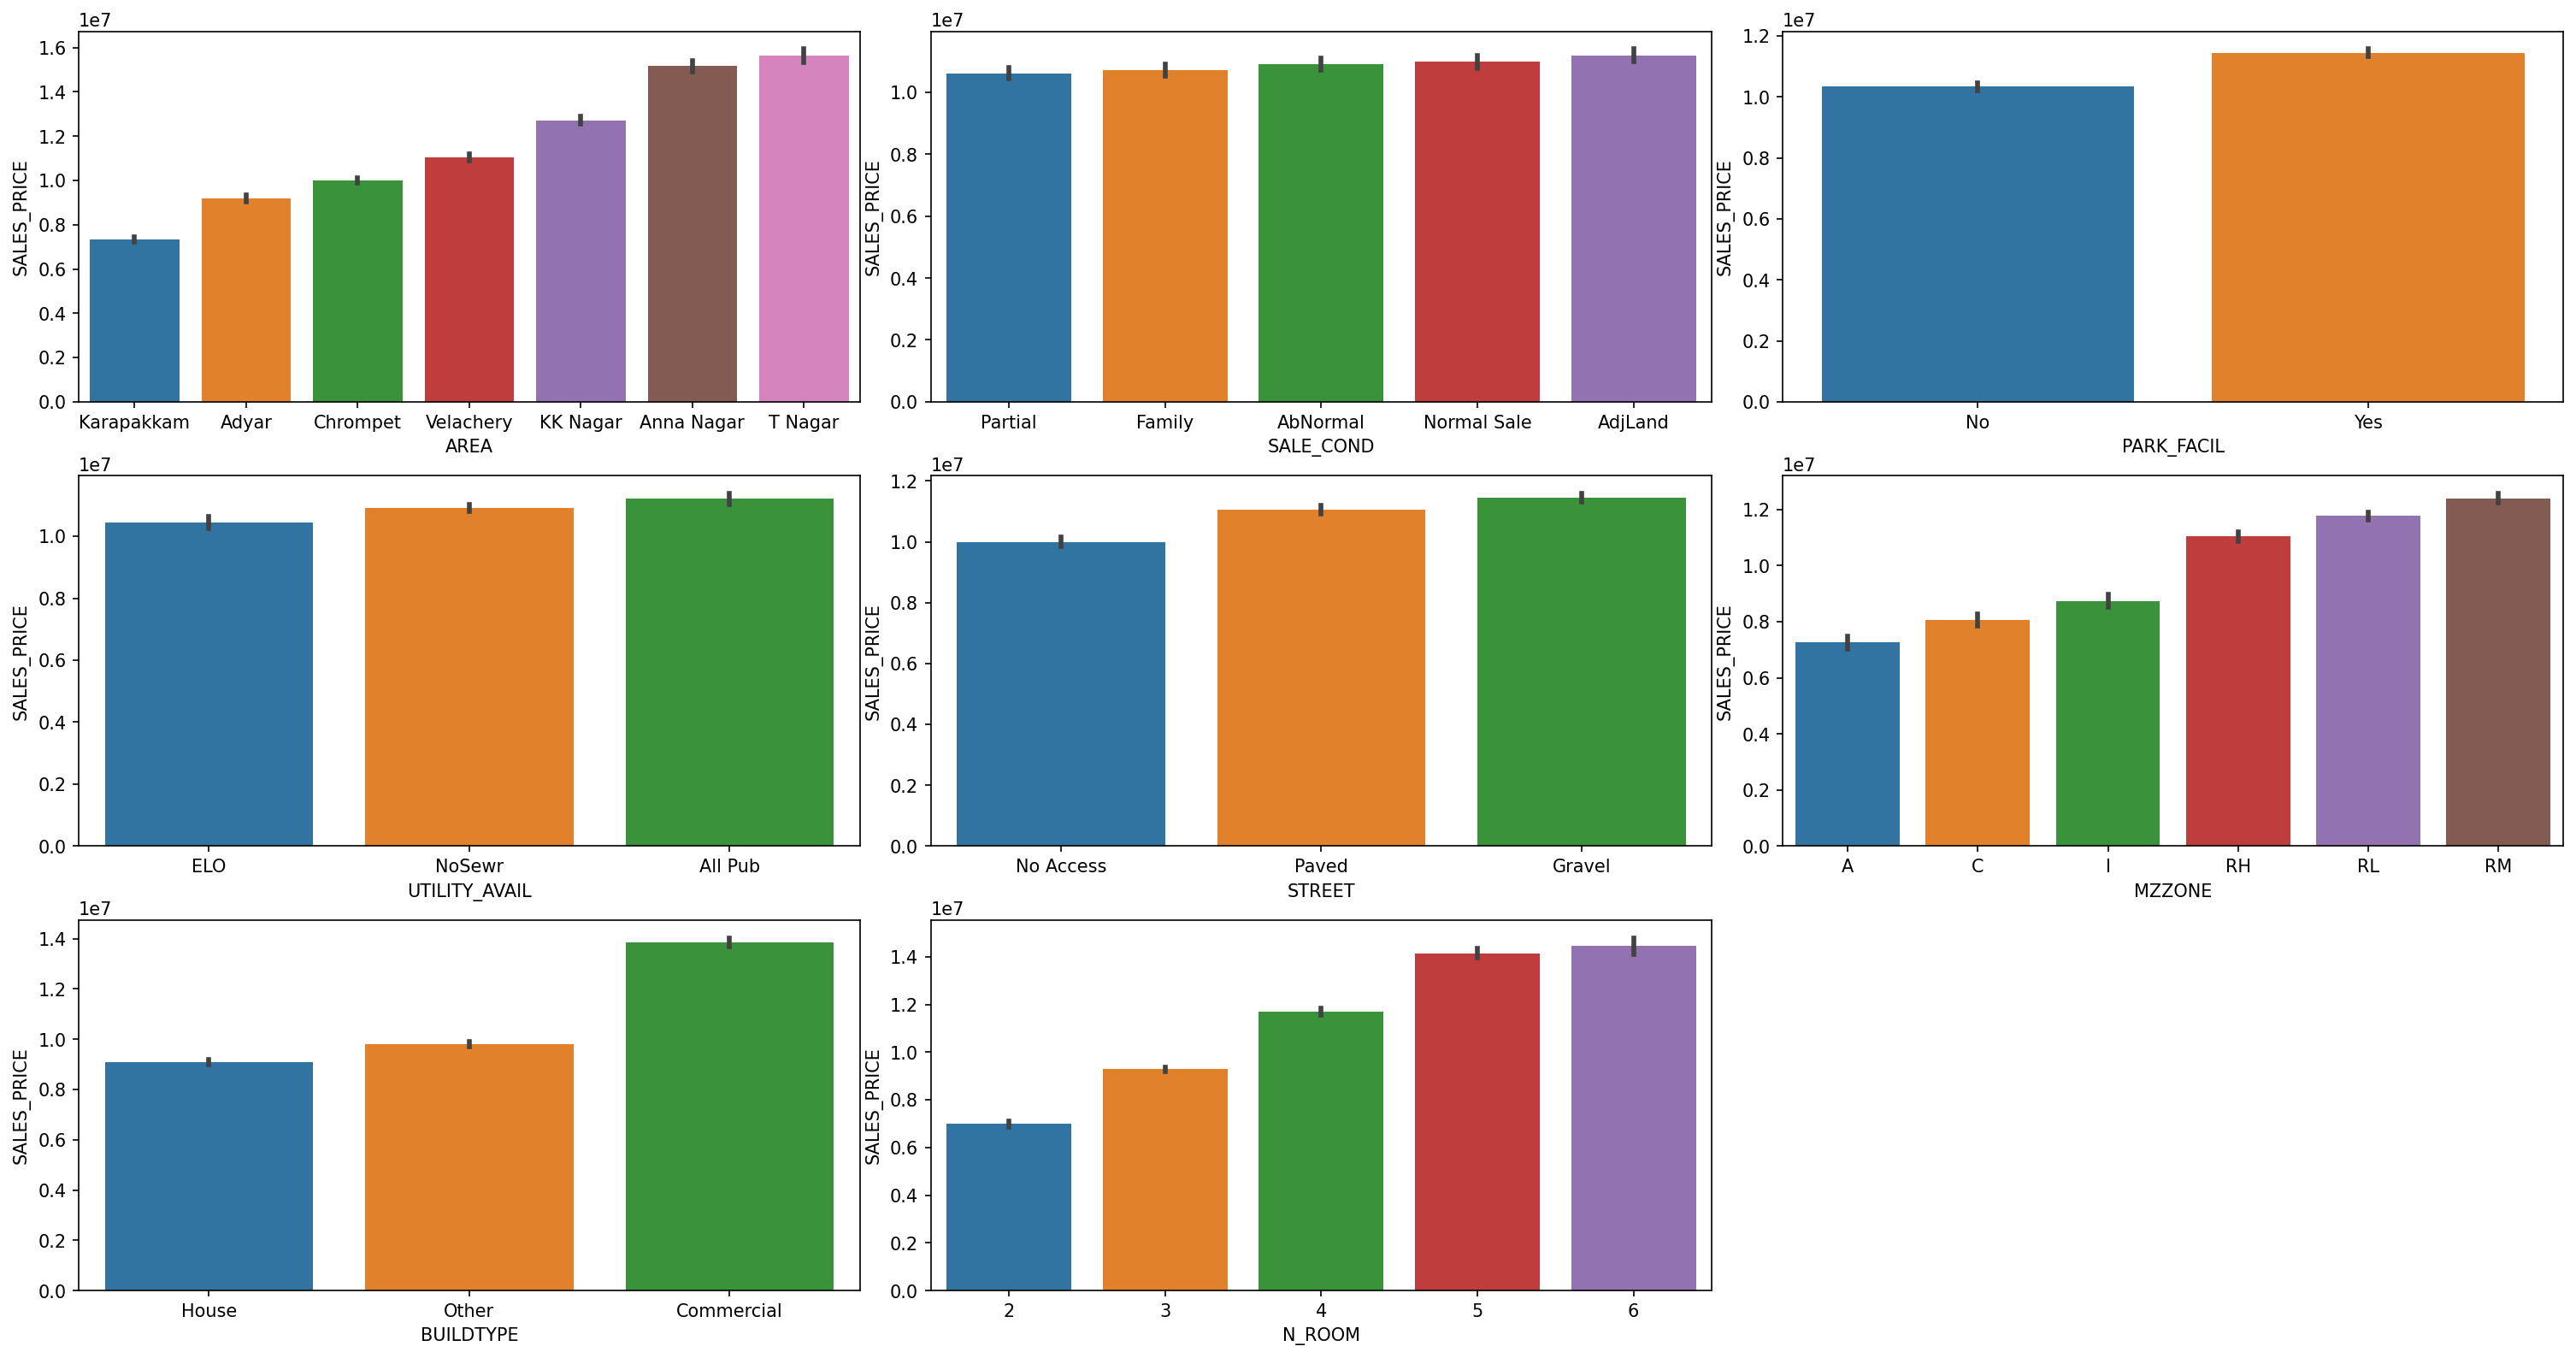

In [30]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((3,6),(0,0),colspan=2)
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(df["AREA"],df["SALES_PRICE"],order = area_order)


plt.subplot2grid((3,6),(0,2),colspan=2)
salecond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(df["SALE_COND"],df["SALES_PRICE"],order = salecond_order)

plt.subplot2grid((3,6),(0,4),colspan=2)
parkfacil_order = df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
sns.barplot(df["PARK_FACIL"],df["SALES_PRICE"],order = parkfacil_order)

plt.subplot2grid((3,6),(1,0),colspan=2)
utility_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(df["UTILITY_AVAIL"],df["SALES_PRICE"],order = utility_order)

plt.subplot2grid((3,6),(1,2),colspan=2)
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(df["STREET"],df["SALES_PRICE"],order = street_order)

plt.subplot2grid((3,6),(1,4),colspan=2)
mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(df["MZZONE"],df["SALES_PRICE"],order = mzzone_order)

plt.subplot2grid((3,6),(2,0),colspan=2)
buildtype_order = df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
sns.barplot(df["BUILDTYPE"],df["SALES_PRICE"],order = buildtype_order)

plt.subplot2grid((3,6),(2,2),colspan=2)
sns.barplot(df["N_ROOM"],df["SALES_PRICE"])

plt.show()

PROPERTY_AGE

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


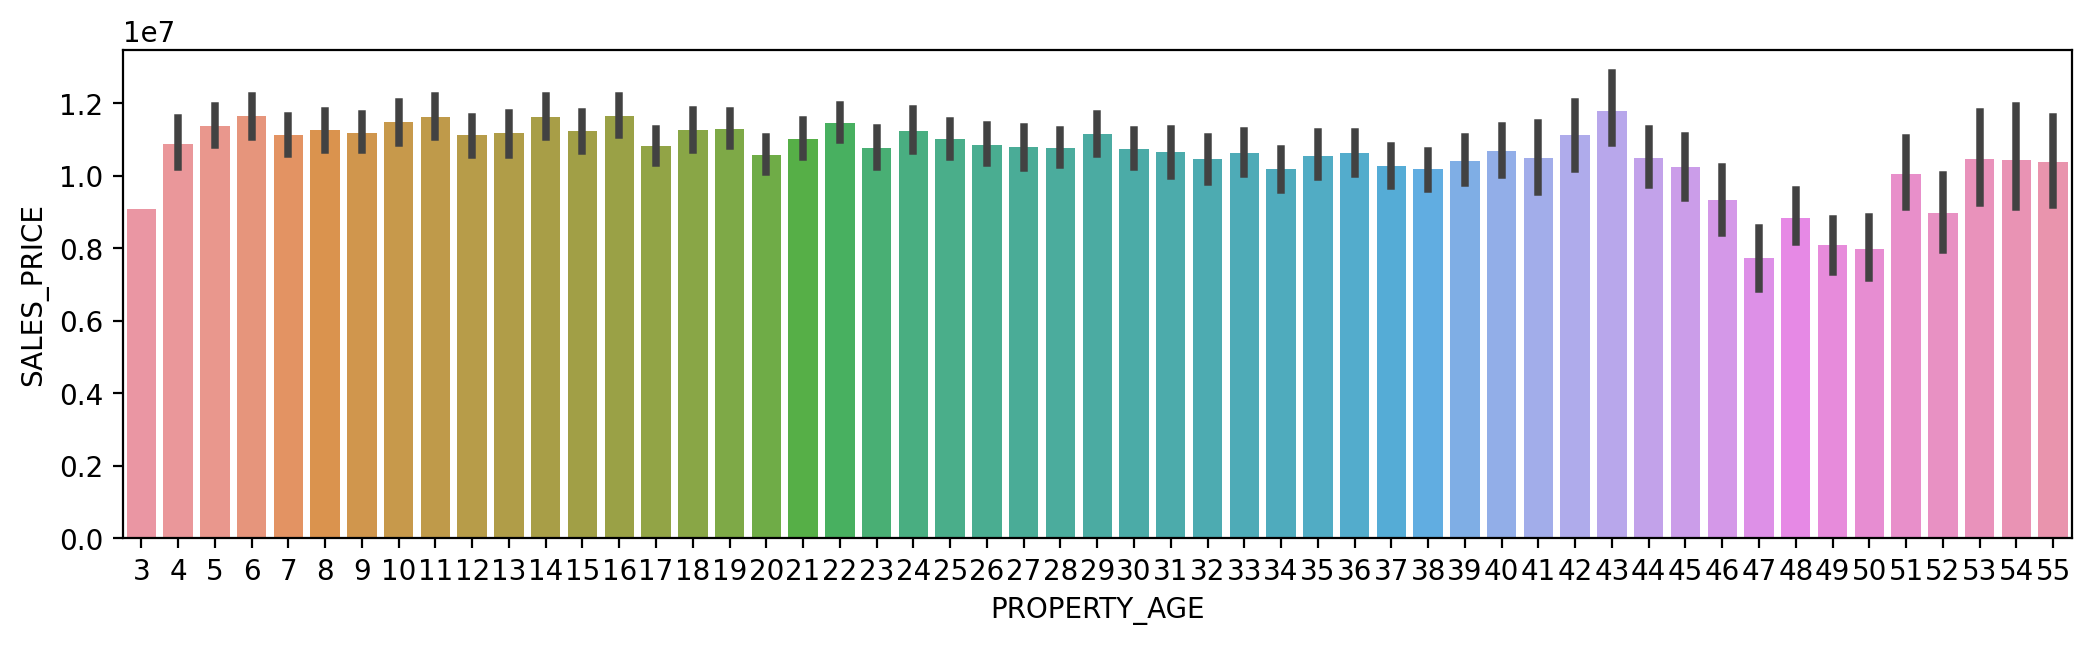

In [31]:
plt.figure(figsize=(40, 11), dpi=200)
plt.subplot2grid((3,6),(2,4),colspan=2)
sns.barplot(df["PROPERTY_AGE"],df["SALES_PRICE"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


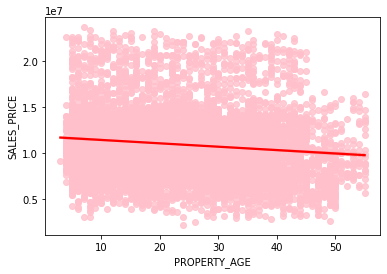

In [32]:
sns.regplot(df.PROPERTY_AGE, df.SALES_PRICE, scatter_kws={"color": "pink"}, line_kws={"color": "red"})

Interpretation

Here we can conclude that:-

1.AREA,PARK_FACIL,STREET,MZZONE,BUILDTYPE,N_ROOM have significant relation with target coloumn(SALES_PRICE).So we can use these features in the model.

2.SALE_COND,UTILITY_AVAIL have very minute relation with target coloumn.But still i am considering these features for building of my model.

3.By incresing PROPERTY_AGE,the SALES_PRICE value is decreasing.So we can use this feature.

In [33]:
df.to_csv('cleaned.csv')

#Encoding

#Label encoding

In [36]:
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1, 'No':0})

#One hot encoding

In [37]:
df=pd.get_dummies(df,columns=["AREA"])
df=pd.get_dummies(df,columns=["UTILITY_AVAIL"])
df=pd.get_dummies(df,columns=["STREET"])
df=pd.get_dummies(df,columns=["MZZONE"])
df=pd.get_dummies(df,columns=["BUILDTYPE"])
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,...,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1004,131,1,1,3,AbNormal,1,4.0,3.9,4.9,...,1,1,0,0,0,0,0,1,0,0
1,1986,26,2,1,5,AbNormal,0,4.9,4.2,2.5,...,0,0,0,0,1,0,0,1,0,0
2,909,70,1,1,3,AbNormal,1,4.1,3.8,2.2,...,0,0,0,0,0,1,0,1,0,0
3,1855,14,3,2,5,Family,0,4.7,3.9,3.6,...,1,0,0,1,0,0,0,0,0,1
4,1226,84,1,1,3,AbNormal,1,3.0,2.5,4.1,...,0,0,1,0,0,0,0,0,0,1


In [38]:
df.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                  int64
N_BATHROOM                 int64
N_ROOM                     int64
SALE_COND                 object
PARK_FACIL                 int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
SALES_PRICE                int64
PROPERTY_AGE               int64
AREA_Adyar                 uint8
AREA_Anna Nagar            uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
UTILITY_AVAIL_All Pub      uint8
UTILITY_AVAIL_ELO          uint8
UTILITY_AVAIL_NoSewr       uint8
STREET_Gravel              uint8
STREET_No Access           uint8
STREET_Paved               uint8
MZZONE_A                   uint8
MZZONE_C                   uint8
MZZONE_I                   uint8
MZZONE_RH                  uint8
MZZONE_RL 

In [39]:
#Removing unnecessary features that is not related with target coloumn
df.drop(['DIST_MAINROAD','SALE_COND','QS_OVERALL','QS_ROOMS','QS_BEDROOM','QS_BATHROOM',],axis=1,inplace=True)

In [40]:
df.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'SALES_PRICE', 'PROPERTY_AGE', 'AREA_Adyar', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'UTILITY_AVAIL_All Pub', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSewr', 'STREET_Gravel', 'STREET_No Access',
       'STREET_Paved', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH',
       'MZZONE_RL', 'MZZONE_RM', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Other'],
      dtype='object')

#Model

#Linear regression

In [41]:
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE'].values

Splitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scaling

In [43]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [44]:
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([ 8083963.47713695,  8851067.47713695, 11152635.47713695, ...,
       10497275.47713695, 12990715.47713695,  5628731.47713695])

In [46]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9558908280296753


#KNN Algorithm

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
   knn = KNeighborsRegressor(i) #initialising the model
   knn.fit(X_train_scaled,y_train) # training the model
   print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring = "roc_auc"))) #predicting using the model

In [ ]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9238989330252537

#Decision tree regressor

In [47]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

In [48]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([ 9218792.25622407,  9218792.25622407,  9150989.09975669, ...,
        9218792.25622407, 13662100.32258064,  7635219.08560311])

In [49]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8470159679760865


#Random forest regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [51]:
y_pred = rf.predict(X_test_scaled) 
y_pred

array([ 8515478.52438622,  8988251.26023273, 11041479.49671824, ...,
       10024143.54465314, 13628355.11602716,  7984387.6634879 ])

In [52]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.7996663468098028


#XG Boost 

In [53]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.4139822904445445  Cross-Val score :  -0.425405967391279
Learning rate :  0.02  Train score :  0.7188240619867649  Cross-Val score :  0.7139375062392099
Learning rate :  0.03  Train score :  0.9097539949737903  Cross-Val score :  0.9057427758731356
Learning rate :  0.04  Train score :  0.9537208608375153  Cross-Val score :  0.9503985144181119
Learning rate :  0.05  Train score :  0.9693346294303943  Cross-Val score :  0.966622030342519
Learning rate :  0.06  Train score :  0.9769913856724004  Cross-Val score :  0.9750562228853253
Learning rate :  0.07  Train score :  0.9825831713182214  Cross-Val score :  0.9799808667863845
Learning rate :  0.08  Train score :  0.9848252566935105  Cross-Val score :  0.9828783632936655
Learning rate :  0.09  Train score :  0.9876618111657465  Cross-Val score :  0.9855529758800039
Learning rate :  0.1  Train score :  0.9889648101443723  Cross-Val score :  0.9873600675212364
Learning rate :  0.11  Train score :  0.9

In [54]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled, y_test)

[06:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9923895627926315

Feature importance

In [55]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'SALES_PRICE', 'PROPERTY_AGE', 'AREA_Adyar', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'UTILITY_AVAIL_All Pub', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSewr', 'STREET_Gravel', 'STREET_No Access',
       'STREET_Paved', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH',
       'MZZONE_RL', 'MZZONE_RM', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Other'],selector.support_))

[('INT_SQFT', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('PARK_FACIL', False),
 ('SALES_PRICE', False),
 ('PROPERTY_AGE', True),
 ('AREA_Adyar', False),
 ('AREA_Anna Nagar', True),
 ('AREA_Chrompet', False),
 ('AREA_KK Nagar', True),
 ('AREA_Karapakkam', False),
 ('AREA_T Nagar', False),
 ('AREA_Velachery', False),
 ('UTILITY_AVAIL_All Pub', False),
 ('UTILITY_AVAIL_ELO', False),
 ('UTILITY_AVAIL_NoSewr', False),
 ('STREET_Gravel', False),
 ('STREET_No Access', False),
 ('STREET_Paved', False),
 ('MZZONE_A', False),
 ('MZZONE_C', False),
 ('MZZONE_I', False),
 ('MZZONE_RH', False),
 ('MZZONE_RL', False),
 ('MZZONE_RM', False),
 ('BUILDTYPE_Commercial', False),
 ('BUILDTYPE_House', False)]

In [56]:

from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'SALES_PRICE', 'PROPERTY_AGE', 'AREA_Adyar', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'UTILITY_AVAIL_All Pub', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSewr', 'STREET_Gravel', 'STREET_No Access',
       'STREET_Paved', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH',
       'MZZONE_RL', 'MZZONE_RM', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Other'],sfs.get_support())))

[('INT_SQFT', True), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('PARK_FACIL', False), ('SALES_PRICE', False), ('PROPERTY_AGE', False), ('AREA_Adyar', False), ('AREA_Anna Nagar', False), ('AREA_Chrompet', False), ('AREA_KK Nagar', False), ('AREA_Karapakkam', False), ('AREA_T Nagar', False), ('AREA_Velachery', False), ('UTILITY_AVAIL_All Pub', False), ('UTILITY_AVAIL_ELO', False), ('UTILITY_AVAIL_NoSewr', False), ('STREET_Gravel', False), ('STREET_No Access', False), ('STREET_Paved', False), ('MZZONE_A', False), ('MZZONE_C', False), ('MZZONE_I', False), ('MZZONE_RH', False), ('MZZONE_RL', False), ('MZZONE_RM', True), ('BUILDTYPE_Commercial', False), ('BUILDTYPE_House', False)]


Text(0.5, 1.0, 'Feature Importance')

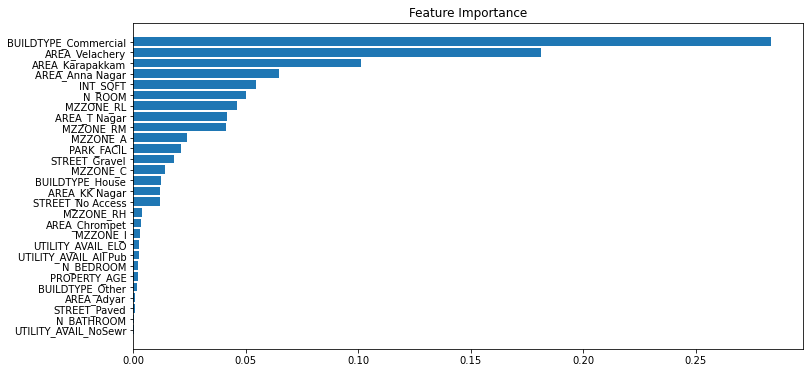

In [57]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

#Conclusion

#~~Among all the models,XGBoost gives the best result(score=0.99).This is the best learning model.